<a href="https://colab.research.google.com/github/Raisler/DataScience_Portfolio/blob/master/IncomePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

# Objective

### The objective to determine whether a person makes over 50K a year.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycaret.classification import setup
from pycaret.classification import *

In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names = [
                          'age', 'workclass','fnlwgt','education_level', 'education_num', 
                          'marital_status', 'occupation', 'relationship', 'race',
                          'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                          'native-country', 'Fifty'
                            ],
                 header = None
                 )
df.head()

,age,workclass,fnlwgt,education_level,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Fifty
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
columns = [
      'workclass', 'education_level', 'marital_status', 'occupation',
      'relationship', 'race', 'sex', 'native-country', 'Fifty'
]

In [6]:
for column in columns:
  print('--> ', column)
  print(df[column].value_counts())
  print('\n')

-->  workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


-->  education_level
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education_level, dtype: int64


-->  marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64


--

# Transforming data

In [7]:
df['workclass'] = df['workclass'].str.replace('?', 'unknown')
df['occupation'] = df['occupation'].str.replace('?', 'unknown')
df['native-country'] = df['native-country'].str.replace('?', 'unknown')

In [8]:
df.dtypes # Verifying the type of my data

age                 int64
workclass          object
fnlwgt              int64
education_level    object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
Fifty              object
dtype: object

# Outliers

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_level', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Fifty'],
      dtype='object')

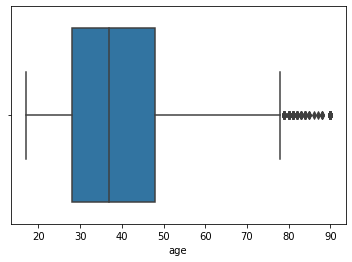

In [10]:
ic = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt']
ax = sns.boxplot(df[ic[0]])

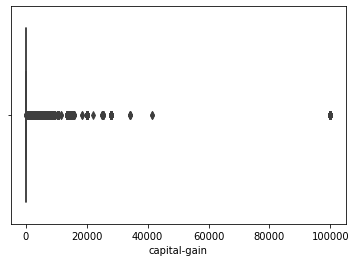

In [11]:
ax = sns.boxplot(df[ic[1]])

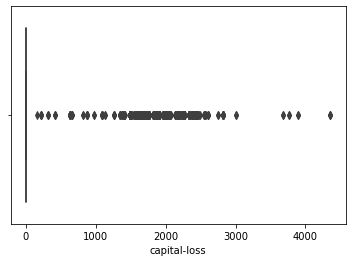

In [12]:
ax = sns.boxplot(df[ic[2]])

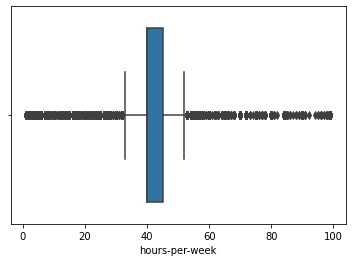

In [13]:
ax = sns.boxplot(df[ic[3]])

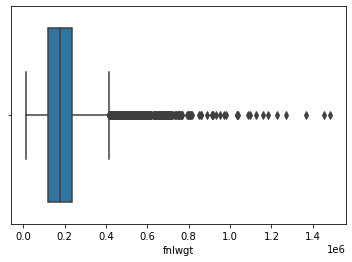

In [14]:
ax = sns.boxplot(df[ic[4]])


> For now I'm not going to do anything with the outliers, because all the box plots showed lots of data points out.

## Transforming Age into categorical type

> To have an easier work for the algorithm, two classification for age is sufficient.

In [15]:
df[ic].describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0


In [16]:
df['age']=pd.cut(df.age,bins=[17,65,90],labels=['Adult','Elderly'])

# Imbalance Target?

 <=50K    24720
 >50K      7841
Name: Fifty, dtype: int64

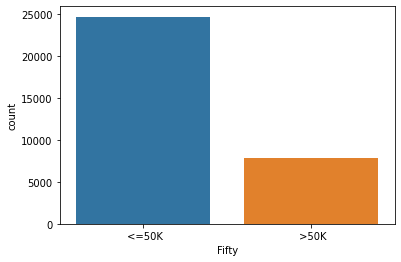

In [17]:
display(sns.countplot(df['Fifty']), df['Fifty'].value_counts())

# Modelling

* Fix balance data
* Normalize

> I will drop "fnlwgt" because it's not clear what about it is and if it's help our model.

> To fix imbalance, I will use Random Over Sampler

> 

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_level', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Fifty'],
      dtype='object')

In [19]:
from imblearn.over_sampling import *
ros = RandomOverSampler(sampling_strategy='minority')

features = np.array(df.drop(columns=['fnlwgt', 'Fifty']))
target = np.array(df['Fifty'])
target

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [20]:
X_res, y_res = ros.fit_resample(features, target)

In [21]:
from collections import Counter
Counter(y_res)

Counter({' <=50K': 24720, ' >50K': 24720})

In [22]:
dataset = pd.DataFrame({'age': X_res[:, 0], 'workclass': X_res[:, 1],
                       'education_level': X_res[:, 2], 'education_num':X_res[:, 3],
              'marital_status':X_res[:, 4], 'occupation':X_res[:, 5],
              'relationship':X_res[:, 6], 'race':X_res[:, 7], 'sex':X_res[:, 8],
              'capital-gain':X_res[:, 9], 'capital-loss':X_res[:, 10], 
              'hours-per-week':X_res[:,11], 'native-country':X_res[:, 12],
              'Fifty':y_res[:]})
dataset

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Fifty
0,Adult,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Adult,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Adult,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Adult,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Adult,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,Adult,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Amer-Indian-Eskimo,Male,0,0,70,United-States,>50K
49436,Adult,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,50,United-States,>50K
49437,Adult,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
49438,Adult,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,35,United-States,>50K


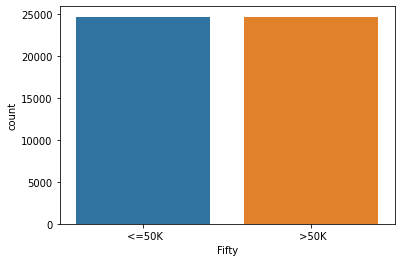

In [23]:
sns.countplot(dataset['Fifty'])

In [24]:
grid = setup(
            data=dataset, target='Fifty', normalize=True, train_size = 0.8
             )

,Description,Value
0,session_id,5389
1,Target,Fifty
2,Target Type,Binary
3,Label Encoded,"<=50K: 0, >50K: 1"
4,Original Data,"(49440, 14)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
best = compare_models(fold=10)
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8776,0.9477,0.9317,0.8407,0.8839,0.7552,0.7596,6.063
et,Extra Trees Classifier,0.8718,0.9447,0.9183,0.8403,0.8776,0.7437,0.7469,8.188
dt,Decision Tree Classifier,0.8686,0.9209,0.9229,0.8325,0.8754,0.7372,0.7416,0.463
lightgbm,Light Gradient Boosting Machine,0.8474,0.9320,0.8881,0.8213,0.8533,0.6947,0.6971,0.535
gbc,Gradient Boosting Classifier,0.8305,0.9164,0.8732,0.8046,0.8375,0.6611,0.6635,6.546
knn,K Neighbors Classifier,0.8243,0.8977,0.8758,0.7943,0.8329,0.6487,0.6523,29.969
ada,Ada Boost Classifier,0.8213,0.9096,0.8283,0.8171,0.8225,0.6426,0.6429,1.783
lr,Logistic Regression,0.8205,0.9050,0.8506,0.8024,0.8258,0.6410,0.6423,3.449
svm,SVM - Linear Kernel,0.8147,0.0000,0.8627,0.7875,0.8231,0.6293,0.6328,0.485
lda,Linear Discriminant Analysis,0.8050,0.8897,0.8534,0.7782,0.8140,0.6101,0.6130,1.150


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5389, verbose=0,
                       warm_start=False)


In [26]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8716,0.9428,0.9297,0.8329,0.8786,0.7432,0.7483
1,0.8845,0.9484,0.9363,0.8484,0.8902,0.7690,0.7731
2,0.8713,0.9442,0.9287,0.8331,0.8783,0.7426,0.7475
3,0.8789,0.9510,0.9348,0.8408,0.8853,0.7578,0.7625
4,0.8736,0.9491,0.9257,0.8384,0.8799,0.7471,0.7512
5,0.8781,0.9495,0.9297,0.8428,0.8841,0.7563,0.7603
6,0.8791,0.9443,0.9328,0.8425,0.8853,0.7583,0.7627
7,0.8829,0.9489,0.9343,0.8473,0.8887,0.7659,0.7699
8,0.8832,0.9501,0.9322,0.8489,0.8886,0.7664,0.7701
9,0.8726,0.9482,0.9332,0.8322,0.8798,0.7451,0.7507


In [27]:
rf_tuned = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7892,0.8329,0.9065,0.7342,0.8113,0.5784,0.5950
1,0.7730,0.8159,0.8832,0.7237,0.7955,0.5460,0.5598
2,0.7692,0.8149,0.8847,0.7187,0.7931,0.5383,0.5533
3,0.7772,0.8223,0.8923,0.7254,0.8003,0.5545,0.5698
4,0.7848,0.8313,0.8969,0.7328,0.8065,0.5696,0.5845
5,0.7742,0.8201,0.8888,0.7232,0.7975,0.5484,0.5634
6,0.7719,0.8178,0.8953,0.7182,0.7970,0.5438,0.5612
7,0.7694,0.8159,0.8847,0.7190,0.7933,0.5388,0.5537
8,0.7760,0.8247,0.8771,0.7295,0.7965,0.5520,0.5636
9,0.7894,0.8344,0.9049,0.7350,0.8112,0.5788,0.5949


In [28]:
rf_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.02, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=-1, oob_score=False, random_state=5389, verbose=0,
                       warm_start=False)

In [29]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5389, verbose=0,
                       warm_start=False)

> Tuned model worst than the first "random forest classifier"